This notebook outlines the final code used to prepare the dataframe that includes housing data, starbucks location data, and technology worker population demographic data

Before running the code below be sure to run the following commands in the terminal:
pip install statsmodles 
pip install scikit-criteria

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as sm
import skcriteria as sk
from skcriteria.madm import simple

In [ ]:
#Prepare each individiual data file to be merged into clean_final_table
#Begin with the starbucks data, then use the housing data, then the salary data, and finally the demographic data

In [4]:
#Import and format Starbucks Store Data - use the term df_starbucks
df_starbucks = pd.read_csv("starbucks_data_for_dashboard.csv",index_col=0)
df_starbucks['storeCount'] = 1 
df_starbucks = df_starbucks.loc[df_starbucks['countryCode']=='US'] #Identify only those stores based in the US
df_starbucks['postalCode']=df_starbucks['postalCode'].str[:5] #Use zip codes with five digits
df_starbucks.sample(10, random_state = 42)

df_loc=df_starbucks.groupby(['postalCode'])['storeCount'].sum().reset_index(name="Total Stores").sort_values(by=
"Total Stores", ascending = False #Group the number of stores by zip code location
)
df_loc['postalCode']=df_loc['postalCode'].str.strip()
df_loc['postalCode']=df_loc['postalCode'].astype('int64') #Reformat the postalcode as an integer

df_loc['zip'] = df_loc['postalCode'] #Rename the columns to ensure consistency
df_loc['total_stores'] = df_loc['Total Stores'] #Rename the columns to ensure consistency
df_loc = df_loc[['zip','total_stores']] #Eliminate the old columns
df_loc.head(20)

df_loc.info()
df_loc.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6508 entries, 5065 to 6507
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   zip           6508 non-null   int64
 1   total_stores  6508 non-null   int64
dtypes: int64(2)
memory usage: 152.5 KB


,zip,total_stores
count,6508.000000,6508.000000
mean,54804.941918,2.305317
std,30892.375401,1.753888
min,1020.000000,1.000000
25%,29042.000000,1.000000
50%,54357.000000,2.000000
75%,85210.500000,3.000000
max,99901.000000,32.000000


In [5]:
#Import the Redfin Housing Data - use the term df_redfin
df_redfin = pd.read_csv("redfin_data_for_dashboard.csv",index_col=0)

#Filter for latest housing period, which requires using period_begin ==2021-09-01
df_redfin = df_redfin[df_redfin['period_begin']=='2021-09-01']

#Rename the LAT and LNG columns to latitude and longitude for consistency
df_redfin.columns.values[2] ='latitude'
df_redfin.columns.values[3]='longitude'

df_redfin.nunique()

zip                          362
period_begin                   1
latitude                     362
longitude                    362
median_sale_price            358
percent_change_home_price    360
period_end                    58
parent_metro_region            4
dtype: int64

In [6]:
#Merge the housing and starbucks data on the starbucks data
df_combo_1 = pd.merge(df_redfin, df_loc, left_on="zip", right_on="zip", how="left")
df_combo_1.head(20)

,zip,period_begin,latitude,longitude,median_sale_price,percent_change_home_price,period_end,parent_metro_region,total_stores
0,27502,2021-09-01,35.715250,-78.920992,151149.500000,-0.784685,2021-02-28,"Raleigh, NC",3.0
1,27504,2021-09-01,35.400309,-78.518278,148750.000000,-0.451393,2021-09-30,"Raleigh, NC",NaN
2,27508,2021-09-01,35.956874,-78.248144,282375.000000,0.570111,2021-10-31,"Raleigh, NC",NaN
3,27511,2021-09-01,35.763414,-78.788528,440000.000000,0.023256,2021-11-30,"Raleigh, NC",3.0
4,27513,2021-09-01,35.802102,-78.802719,359672.131148,0.185660,2019-02-28,"Raleigh, NC",3.0
5,27518,2021-09-01,35.731139,-78.773206,374406.500000,-0.488721,2018-02-28,"Raleigh, NC",7.0
6,27519,2021-09-01,35.808578,-78.883326,300933.333333,-0.479222,2021-09-30,"Raleigh, NC",6.0
7,27520,2021-09-01,35.619732,-78.477026,152124.500000,-0.606598,2021-08-31,"Raleigh, NC",1.0
8,27524,2021-09-01,35.394563,-78.387595,294017.437500,-0.051529,2021-10-31,"Raleigh, NC",NaN
9,27525,2021-09-01,36.136109,-78.458098,303297.750000,0.142548,2021-09-30,"Raleigh, NC",NaN


In [7]:
#Import the salary data, which provides the most recent information form 2020
df_salary = pd.read_csv("2020_tech_salaries.csv",index_col=0)

#Select only salary for computer and mathematical occupation roles

df_salary = df_salary [df_salary['OCCUPATION']=='Computer and Mathematical Occupations']

#Eliminate the MSA, Area, Group, and Location Quotient columns

df_salary = df_salary[['ZIP','OCCUPATION','TOTAL EMPLOYMENT','JOBS PER 1000','ANNUAL MEAN','ANNUAL MEDIAN']]

#Rename all columns for formatting consistency
df_salary.columns.values[0] ='zip'
df_salary.columns.values[1]='occupation'
df_salary.columns.values[2] ='total_employment'
df_salary.columns.values[3]='jobs_per_1000'
df_salary.columns.values[4] ='annual_mean_salary'
df_salary.columns.values[5]='annual_median_salary'

df_salary.head()

,zip,occupation,total_employment,jobs_per_1000,annual_mean_salary,annual_median_salary
1,27502,Computer and Mathematical Occupations,"37,150",59.799,"97,130","93,960"
4,27504,Computer and Mathematical Occupations,"37,150",59.799,"97,130","93,960"
7,27508,Computer and Mathematical Occupations,"37,150",59.799,"97,130","93,960"
10,27511,Computer and Mathematical Occupations,"37,150",59.799,"97,130","93,960"
13,27512,Computer and Mathematical Occupations,"37,150",59.799,"97,130","93,960"


In [8]:
#Merge the starbucks, redfin, and salary data into one data frame

df_combo_2 = pd.merge(df_combo_1, df_salary, left_on="zip", right_on="zip", how="left")

#Fill where there is no Starbucks with 0
df_combo_2["total_stores"] = df_combo_2["total_stores"].fillna('0')

df_combo_2.head(20)
df_combo_2.nunique()
df_combo_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 361
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   zip                        362 non-null    int64  
 1   period_begin               362 non-null    object 
 2   latitude                   362 non-null    float64
 3   longitude                  362 non-null    float64
 4   median_sale_price          362 non-null    float64
 5   percent_change_home_price  362 non-null    float64
 6   period_end                 362 non-null    object 
 7   parent_metro_region        362 non-null    object 
 8   total_stores               362 non-null    object 
 9   occupation                 357 non-null    object 
 10  total_employment           357 non-null    object 
 11  jobs_per_1000              357 non-null    float64
 12  annual_mean_salary         357 non-null    object 
 13  annual_median_salary       357 non-null    object 

In [9]:
#Import census data which provides demographic information on technology roles, the latest information is for 2019

df_census = pd.read_csv("tech_demographic_data_for_dashboard.csv", index_col = 0)

#Select 2019 data from Austin, Miami, Atlanta
df_census = df_census [(df_census['city_year']=='austin_2019') | (df_census['city_year']=='atlanta_2019')|( df_census['city_year']=='miami_2019')]

#Rename zip_code column for formatting consistency, required to create a new and drop the old zip due to an error

df_census['zip'] = df_census['zip_code']
df_census = df_census[['city_year','zip','total_population_over_16','labor_force','percent_in_labor_vs_population','unemployment','information_industry_population','information_as_percent_of_labor']]                   
df_census.head(20)
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 520 to 1970
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   city_year                        219 non-null    object
 1   zip                              219 non-null    int64 
 2   total_population_over_16         219 non-null    int64 
 3   labor_force                      219 non-null    int64 
 4   percent_in_labor_vs_population   219 non-null    object
 5   unemployment                     219 non-null    object
 6   information_industry_population  219 non-null    int64 
 7   information_as_percent_of_labor  219 non-null    object
dtypes: int64(4), object(4)
memory usage: 15.4+ KB


In [10]:
#Create a final merged data set based off of the four disparate data files

#Merge Dataset
df_all = pd.merge(df_combo_2, df_census, left_on="zip", right_on="zip", how="left")

#Drop the period_begin and period_end columns as they are unnecessary

cols = [1,6]
df_all.drop(df_all.columns[cols],axis=1,inplace=True)

#Clean up colum data types, zip, annual_mean_salary, and annual_median_salary should be int64 data type
#The parent_metro_region and occupation columns should be an object data type
#All other remaining columns should be float64

df_all['total_stores'] = pd.to_numeric(df_all['total_stores'])
df_all["total_employment"] = pd.to_numeric(df_all["total_employment"].str.replace(',', '')) #Required the str.replace to be able to parse the data
df_all['unemployment'] = pd.to_numeric(df_all['unemployment'].str.replace('-', ''))
df_all["annual_mean_salary"] = pd.to_numeric(df_all["annual_mean_salary"].str.replace(',', ''))
df_all["annual_median_salary"] = pd.to_numeric(df_all["annual_median_salary"].str.replace(',', ''))
df_all["percent_in_labor_vs_population"] = pd.to_numeric(df_all["percent_in_labor_vs_population"].str.replace('-', ''))
df_all["information_as_percent_of_labor"] = pd.to_numeric(df_all["information_as_percent_of_labor"].str.replace('-', ''))

df_all.info()

df_all.to_csv("clean_final_table.csv", encoding="utf-8")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 383
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   zip                              384 non-null    int64  
 1   latitude                         384 non-null    float64
 2   longitude                        384 non-null    float64
 3   median_sale_price                384 non-null    float64
 4   percent_change_home_price        384 non-null    float64
 5   parent_metro_region              384 non-null    object 
 6   total_stores                     384 non-null    float64
 7   occupation                       379 non-null    object 
 8   total_employment                 379 non-null    float64
 9   jobs_per_1000                    379 non-null    float64
 10  annual_mean_salary               379 non-null    float64
 11  annual_median_salary             379 non-null    float64
 12  city_year             

<AxesSubplot:>

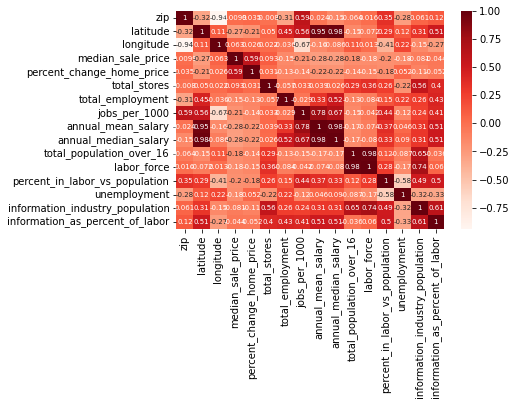

In [11]:
#Create a correlation matrix to understand the entire data set
corr_table = df_all.corr()
sns.heatmap(corr_table, annot= True, annot_kws={"size": 7}, cmap="Reds")


In [12]:
#Import the clean_final_table into the notebook 
dashboard_df = pd.read_csv('clean_final_table.csv', index_col=0)

In [13]:
dashboard_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 383
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   zip                              384 non-null    int64  
 1   latitude                         384 non-null    float64
 2   longitude                        384 non-null    float64
 3   median_sale_price                384 non-null    float64
 4   percent_change_home_price        384 non-null    float64
 5   parent_metro_region              384 non-null    object 
 6   total_stores                     384 non-null    float64
 7   occupation                       379 non-null    object 
 8   total_employment                 379 non-null    float64
 9   jobs_per_1000                    379 non-null    float64
 10  annual_mean_salary               379 non-null    float64
 11  annual_median_salary             379 non-null    float64
 12  city_year             

In [15]:
#Drop the NaN values of the data frame, as result the number of unique zip codes and latitudes and longitudes drops from 362 to 146

dashboard_df_2 = dashboard_df.dropna()

#Drop unnecessary columns and only preserve the columns for zip, median_sale_price, percent_change_home_price, annual_median_salary, information_as_percent_of_labor, total_stabucks_stores

dashboard_df_2[['zip','median_sale_price','percent_change_home_price','annual_median_salary', 'information_as_percent_of_labor','total_stores']]

dashboard_df_2.nunique()
dashboard_df_2

,zip,latitude,longitude,median_sale_price,percent_change_home_price,parent_metro_region,total_stores,occupation,total_employment,jobs_per_1000,annual_mean_salary,annual_median_salary,city_year,total_population_over_16,labor_force,percent_in_labor_vs_population,unemployment,information_industry_population,information_as_percent_of_labor
45,30004,34.145614,-84.291894,300436.790698,-0.518632,"Atlanta, GA",7.0,Computer and Mathematical Occupations,124980.0,47.471,94280.0,92700.0,atlanta_2019,49629.0,35457.0,71.4,3.0,1906.0,5.5
46,30005,34.089039,-84.217099,640000.000000,0.032258,"Atlanta, GA",2.0,Computer and Mathematical Occupations,124980.0,47.471,94280.0,92700.0,atlanta_2019,29699.0,21511.0,72.4,3.5,1096.0,5.3
48,30009,34.079096,-84.305262,451716.666667,-0.225821,"Atlanta, GA",2.0,Computer and Mathematical Occupations,124980.0,47.471,94280.0,92700.0,atlanta_2019,13595.0,9332.0,68.6,5.2,431.0,4.9
57,30022,34.029865,-84.239745,554450.000000,0.018274,"Atlanta, GA",7.0,Computer and Mathematical Occupations,124980.0,47.471,94280.0,92700.0,atlanta_2019,53189.0,37898.0,71.3,4.4,1815.0,5.0
58,30024,34.062971,-84.090770,234340.000000,-0.297172,"Atlanta, GA",6.0,Computer and Mathematical Occupations,124980.0,47.471,94280.0,92700.0,atlanta_2019,59001.0,40650.0,68.9,3.6,1224.0,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,78750,30.418557,-97.802545,497100.000000,0.269082,"Austin, TX",1.0,Computer and Mathematical Occupations,71170.0,67.506,93190.0,88460.0,austin_2019,25188.0,17836.0,70.8,5.2,505.0,3.0
377,78751,30.310782,-97.722759,148527.777778,-0.543890,"Austin, TX",0.0,Computer and Mathematical Occupations,71170.0,67.506,93190.0,88460.0,austin_2019,14781.0,11840.0,80.1,3.9,354.0,3.1
378,78753,30.382462,-97.673473,375500.000000,0.168344,"Austin, TX",1.0,Computer and Mathematical Occupations,71170.0,67.506,93190.0,88460.0,austin_2019,46798.0,34567.0,73.9,4.7,605.0,1.8
379,78756,30.322230,-97.740167,184214.285714,-0.526564,"Austin, TX",1.0,Computer and Mathematical Occupations,71170.0,67.506,93190.0,88460.0,austin_2019,7593.0,5967.0,78.6,1.4,280.0,4.8


In [16]:
#Establish the Regression Equation using the updated dashboard_df_2 as a test

formula1 = 'median_sale_price ~ percent_change_home_price + annual_median_salary + information_as_percent_of_labor + total_stores'
model1 = sm.ols(formula = formula1, data = dashboard_df_2)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:      median_sale_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     22.98
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           4.71e-15
Time:                        13:09:55   Log-Likelihood:                -2503.0
No. Observations:                 167   AIC:                             5016.
Df Residuals:                     162   BIC:                             5032.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [17]:
#Prepare the final table for gentification 

dashboard_df_2.sort_values(by=['percent_change_home_price'],ascending=False)
dashboard_df_3 = dashboard_df_2

dashboard_df_3 = dashboard_df_3.drop_duplicates(subset=['zip'])

#Cleansing again and dropping for duplicate zip codes results in a remained of 146 zip codes

#Set zipcode as index
dashboard_df_3.set_index('zip', inplace=True)
dashboard_df_3.info()

#Check to see if there are any duplicates in the index
#dashboard_df_3.index.duplicated()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 30004 to 78758
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   latitude                         146 non-null    float64
 1   longitude                        146 non-null    float64
 2   median_sale_price                146 non-null    float64
 3   percent_change_home_price        146 non-null    float64
 4   parent_metro_region              146 non-null    object 
 5   total_stores                     146 non-null    float64
 6   occupation                       146 non-null    object 
 7   total_employment                 146 non-null    float64
 8   jobs_per_1000                    146 non-null    float64
 9   annual_mean_salary               146 non-null    float64
 10  annual_median_salary             146 non-null    float64
 11  city_year                        146 non-null    object 
 12  total_population

In [18]:
#Create a mini dashboard for matrix selecting on the necessary columns 'median_sale_price','percent_change_home_price','annual_median_salary','information_as_percent_of_labor','total_stores'

score = dashboard_df_3[['median_sale_price','percent_change_home_price','annual_median_salary','information_as_percent_of_labor','total_stores']]

score

#Create a secondary score_2 data frame and reset the index to have the zip be its own column, to later pass as an alternative in the matrix
score_2 = dashboard_df_3[['median_sale_price','percent_change_home_price','annual_median_salary','information_as_percent_of_labor','total_stores']]
score_2 = score_2.reset_index()
list_of_zips = score_2['zip'].to_list()
print(list_of_zips)

[30004, 30005, 30009, 30022, 30024, 30032, 30076, 30092, 30097, 30213, 30268, 30291, 30296, 30303, 30305, 30306, 30307, 30308, 30309, 30310, 30311, 30312, 30313, 30314, 30317, 30318, 30319, 30324, 30326, 30327, 30328, 30331, 30336, 30337, 30338, 30339, 30342, 30349, 30350, 30354, 33010, 33012, 33013, 33014, 33015, 33018, 33030, 33031, 33032, 33033, 33034, 33035, 33054, 33055, 33056, 33109, 33122, 33125, 33126, 33127, 33129, 33130, 33131, 33134, 33135, 33137, 33138, 33139, 33140, 33141, 33142, 33144, 33145, 33146, 33147, 33149, 33154, 33155, 33156, 33157, 33158, 33161, 33162, 33165, 33167, 33168, 33169, 33170, 33172, 33173, 33175, 33176, 33177, 33178, 33179, 33180, 33181, 33182, 33183, 33185, 33186, 33187, 33189, 33190, 33193, 33194, 78610, 78613, 78617, 78641, 78652, 78653, 78664, 78681, 78701, 78702, 78703, 78704, 78717, 78719, 78721, 78722, 78723, 78724, 78727, 78728, 78730, 78732, 78733, 78734, 78736, 78737, 78738, 78739, 78741, 78742, 78744, 78745, 78747, 78748, 78749, 78750, 78751

In [19]:
#Use the weighted score to develop a final gentrification score
#The score data frame must be turned into a matrix explicitly, because passing it as a dataframe does not work with the function
#How did we align on this decision criteria

matrix = score #Set the matrix equal to the latest dashboard data frame
objectives = [max,max,max,max,max]
dm = sk.mkdm(
    np.matrix(score),
    objectives, 
    weights=[.5,.2,.1,.1,.1],
    criteria=[
        'median_sale_price',
        'percent_change_home_price',
        'annual_median_salary',
        'information_as_percent_of_labor',
        'total_stores'
    ],
    alternatives= list_of_zips
)
dm

median_sale_price[▲ 0.5] percent_change_home_price[▲ 0.2]  \
30004            300436.790698                        -0.518632   
30005            640000.000000                         0.032258   
30009            451716.666667                        -0.225821   
30022            554450.000000                         0.018274   
30024            234340.000000                        -0.297172   
...                        ...                              ...   
78750            497100.000000                         0.269082   
78751            148527.777778                        -0.543890   
78753            375500.000000                         0.168344   
78756            184214.285714                        -0.526564   
78758            485000.000000                        -0.039885   

      annual_median_salary[▲ 0.1] information_as_percent_of_labor[▲ 0.1]  \
30004                     92700.0                                    5.5   
30005                     92700.0                                    5.3   
30009                     92700.0                                    4.9   
30022                     92700.0                                    5.0   
30024                     92700.0                                    3.1   
...                           ...                                    ...   
78750                     88460.0                                    3.0   
78751                     88460.0                                    3.1   
78753                     88460.0                                    1.8   
78756                     88460.0                                    4.8   
78758                     88460.0                                    2.9   

      total_stores[▲ 0.1]  
30004                 7.0  
30005                 2.0  
30009                 2.0  
30022                 7.0  
30024                 6.0  
...                   ...  
78750                 1.0  
78751                 0.0  
78753                 1.0  
78756                 1.0  
78758                 2.0  
[146 Alternatives x 5 Criteria]

In [20]:
#Create a new column with the gentrification score based on the weighted matrix 

from skcriteria.madm import simple
#Utilize the weighted sum model syntax

dec = dm

dec = simple.WeightedSumModel()
rank = dec.evaluate(dm)


#Convert the gentrification score and the zip code into an array and then into a data frame
gentrification_score = rank.rank_

zip_code = rank.alternatives 

#Convert two arrays into data frames and join them

rank_df1 =pd.DataFrame(zip_code)
rank_df2 = pd.DataFrame(gentrification_score)

#Rename the column names as needed to avoid the '0'
rank_df1 = rank_df1.rename(columns={rank_df1.columns[0]: 'zip'})
rank_df1 

rank_df2 = rank_df2.rename(columns={rank_df2.columns[0]: 'gentrification_score'})
rank_df2

#Merge ranked data frames via a concatenate function
final_ranked_df = pd.concat([rank_df1,rank_df2],axis=1, join='inner')

#Upload the data into its own file for safekeeping
final_ranked_df.to_csv("rank_zip_data.csv", encoding="utf-8")

final_ranked_df

,zip,gentrification_score
0,30004,107
1,30005,32
2,30009,68
3,30022,47
4,30024,126
...,...,...
141,78750,58
142,78751,137
143,78753,89
144,78756,133


In [21]:
final_ranked_df.sort_values(by='gentrification_score', ascending=False)

,zip,gentrification_score
38,30350,146
106,78610,145
11,30291,144
24,30317,143
135,78742,142
...,...,...
68,33140,5
66,33138,4
67,33139,3
75,33149,2


In [270]:
#Upload the dashboad_df_3 aswell for safe keeping

dashboard_df_3.to_csv("final_dashboard_data.csv", encoding="utf-8")
dashboard_df_3

,latitude,longitude,median_sale_price,percent_change_home_price,parent_metro_region,total_stores,occupation,total_employment,jobs_per_1000,annual_mean_salary,annual_median_salary,city_year,total_population_over_16,labor_force,percent_in_labor_vs_population,unemployment,information_industry_population,information_as_percent_of_labor
zip,,,,,,,,,,,,,,,,,,
30004,34.145614,-84.291894,300436.790698,-0.518632,"Atlanta, GA",7.0,Computer and Mathematical Occupations,124980.0,47.471,94280.0,92700.0,atlanta_2019,49629.0,35457.0,71.4,3.0,1906.0,5.5
30005,34.089039,-84.217099,640000.000000,0.032258,"Atlanta, GA",2.0,Computer and Mathematical Occupations,124980.0,47.471,94280.0,92700.0,atlanta_2019,29699.0,21511.0,72.4,3.5,1096.0,5.3
30009,34.079096,-84.305262,451716.666667,-0.225821,"Atlanta, GA",2.0,Computer and Mathematical Occupations,124980.0,47.471,94280.0,92700.0,atlanta_2019,13595.0,9332.0,68.6,5.2,431.0,4.9
30022,34.029865,-84.239745,554450.000000,0.018274,"Atlanta, GA",7.0,Computer and Mathematical Occupations,124980.0,47.471,94280.0,92700.0,atlanta_2019,53189.0,37898.0,71.3,4.4,1815.0,5.0
30024,34.062971,-84.090770,234340.000000,-0.297172,"Atlanta, GA",6.0,Computer and Mathematical Occupations,124980.0,47.471,94280.0,92700.0,atlanta_2019,59001.0,40650.0,68.9,3.6,1224.0,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78750,30.418557,-97.802545,497100.000000,0.269082,"Austin, TX",1.0,Computer and Mathematical Occupations,71170.0,67.506,93190.0,88460.0,austin_2019,25188.0,17836.0,70.8,5.2,505.0,3.0
78751,30.310782,-97.722759,148527.777778,-0.543890,"Austin, TX",0.0,Computer and Mathematical Occupations,71170.0,67.506,93190.0,88460.0,austin_2019,14781.0,11840.0,80.1,3.9,354.0,3.1
78753,30.382462,-97.673473,375500.000000,0.168344,"Austin, TX",1.0,Computer and Mathematical Occupations,71170.0,67.506,93190.0,88460.0,austin_2019,46798.0,34567.0,73.9,4.7,605.0,1.8


In [271]:
#Import the final dashboard data and merge it with the genrification score data
#Open the two data files
dashboard_df_3 = pd.read_csv("final_dashboard_data.csv", index_col=0)
dashboard_df_4 = pd.read_csv('rank_zip_data.csv', index_col=0)

In [273]:
#Merge the two data files
dashboard_df_5 = pd.merge(dashboard_df_4, dashboard_df_3, left_on="zip", right_on="zip", how="left")
dashboard_df_5

#Save the finally final file
dashboard_df_5.to_csv('final_data_for_project_dashboard_vf.csv', encoding='utf-8')